## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 27)

In [3]:
caly_df.head()

,Województwo,Data urodzenia,IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,2120,137,127,121,113,106,128,109,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,1912,126,123,109,113,103,128,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,2126,126,120,110,107,102,124,113,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,2089,133,111,104,110,99,114,114,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,2853,125,115,91,95,101,124,134,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   IE              1881 non-null   int64   
 3   PI-PROD         1881 non-null   int64   
 4   PI-POKR         1881 non-null   int64   
 5   Prc             1881 non-null   int64   
 6   Psm             1881 non-null   int64   
 7   Pnr             1881 non-null   int64   
 8   Pw              1881 non-null   int64   
 9   PI-PLOD         1881 non-null   int64   
 10  CRj             1881 non-null   int64   
 11  CRk             1881 non-null   int64   
 12  PP              1881 non-null   int64   
 13  OMC             1881 non-null   int64   
 14  WH-KSOM         1881 non-null   int64   
 15  WH-DLUG         1881 non-null   int64   
 16  IP              1881 non-null   int64   
 17  kg ml          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 27)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([103.,  85.,  60.,  56., 283., 350., 264., 195.,  96.,  78.,  67.,
         47.,  44.,  37.,  24.,  23.,  19.,   6.,  10.,  10.,   2.,   7.,
          3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([1903.        , 1945.06666667, 1987.13333333, 2029.2       ,
        2071.26666667, 2113.33333333, 2155.4       , 2197.46666667,
        2239.53333333, 2281.6       , 2323.66666667, 2365.73333333,
        2407.8       , 2449.86666667, 2491.93333333, 2534.        ,
        2576.06666667, 2618.13333333, 2660.2       , 2702.26666667,
        2744.33333333, 2786.4       , 2828.46666667, 2870.53333333,
        2912.6       , 2954.66666667, 2996.73333333, 3038.8       ,
        3080.86666667, 3122.93333333, 3165.        ]),
 <BarContainer object of 30 artists>)

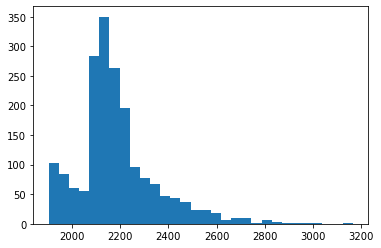

In [13]:
plt.hist(caly_df["IE"],bins=30)

In [14]:
caly_df["IE"].describe()

count    1875.000000
mean     2186.410133
std       166.883876
min      1903.000000
25%      2096.000000
50%      2156.000000
75%      2243.000000
max      3165.000000
Name: IE, dtype: float64

In [15]:
caly_df.loc[(caly_df["IE"]<=2096), "Klasa"] = "Małe"
caly_df.loc[(2096<caly_df["IE"]) & (caly_df["IE"]<=2156), "Klasa"] = "Średnie"
caly_df.loc[(2156<caly_df["IE"]) & (caly_df["IE"]<=2243), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["IE"]>2243, "Klasa"] = "Ekstrimum"

(array([475.,   0.,   0., 470.,   0.,   0., 466.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

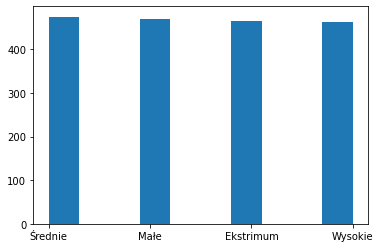

In [16]:
plt.hist(caly_df["Klasa"])

In [17]:
caly_df["Klasa"].value_counts()

Średnie      475
Małe         470
Ekstrimum    466
Wysokie      464
Name: Klasa, dtype: int64

In [18]:
list(caly_df)

['IE',
 'PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [19]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['IE']
test_label=test_df['IE']
#val_label=val_df['IE']

del train_df['IE']
del test_df['IE']
#del val_df['IE']


In [20]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [21]:
len(list(train_df))

47

## 1.2 Standaryzacja

In [22]:
train_df.iloc[:,:24]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
974,130,111,126,117,100,108,118,116,120,98,...,980,380,-2,417,12,113.0,110.0,103.0,108.0,117.0
84,135,109,116,108,104,106,120,119,117,96,...,1263,521,0,446,4,108.0,105.0,110.0,108.0,108.0
753,137,121,121,116,120,110,101,101,100,101,...,1237,666,18,419,2,118.0,115.0,126.0,108.0,121.0
643,117,125,101,103,114,127,123,115,130,114,...,723,305,1,227,-1,102.0,101.0,124.0,127.0,117.0
1438,133,109,104,113,102,108,112,111,116,98,...,1254,485,-3,425,2,108.0,108.0,116.0,111.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,125,118,117,112,100,119,110,108,113,102,...,845,467,14,307,4,110.0,108.0,101.0,118.0,118.0
650,143,129,116,115,115,126,117,115,119,100,...,1448,694,11,509,4,113.0,109.0,122.0,126.0,125.0
732,135,121,107,115,105,123,105,104,104,104,...,1113,561,12,437,9,107.0,109.0,109.0,119.0,123.0
1226,128,124,104,108,110,127,106,103,109,109,...,1111,407,-5,380,2,105.0,103.0,118.0,128.0,120.0


In [23]:
scaler = StandardScaler()
train_df.iloc[:,:24]=scaler.fit_transform(train_df.iloc[:,:24])
test_df.iloc[:,:24]=scaler.fit_transform(test_df.iloc[:,:24])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [24]:
train_df.iloc[:,20:29]

,sm,nr,w,og,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE
974,0.891719,-1.253508,-1.582152,0.297493,0,0,0,0,0
84,-0.188542,-0.294750,-1.582152,-1.048403,0,0,0,0,0
753,1.971980,1.896698,-1.582152,0.895669,0,0,0,0,0
643,-1.052750,1.622767,1.088977,0.297493,0,0,0,0,0
1438,0.459615,0.527043,-1.160395,-0.450227,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
143,0.459615,-1.527439,-0.176295,0.447037,0,0,0,0,0
650,0.675667,1.348836,0.948391,1.493845,0,0,0,0,0
732,0.675667,-0.431715,-0.035709,1.194757,0,0,0,0,0
1226,-0.620646,0.800974,1.229563,0.746125,0,0,0,0,0


In [25]:
train_df.shape

(1500, 47)

In [26]:
test_df.shape

(375, 47)

In [27]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [28]:
train_df

array([[ 0.45476225, -0.93083361,  2.37267516, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23222221, -1.21598635,  1.10580699, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.5432062 ,  0.49493011,  1.73924108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.23222221,  0.49493011, -0.03437436, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14377826,  0.92265923, -0.41443481, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466569, -0.36052812,  1.23249381, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [30]:
train_label

array([2085, 2142, 2037, ..., 2128, 2096, 2058], dtype=int64)

In [31]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [32]:
p = {'first_neuron':[250,320,390], #
     'hidden_neuron':[25,50],#
     'hidden_layers':[1,2,3],  #
     'batch_size': [64,128], #
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['orthogonal','identity','zeros','ones','uniform'],
     'epochs': [2000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['relu'], # do zrobienia potem
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#    'activation_layer':['sigmoid','tanh','selu','elu','relu'],

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [33]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=10,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [ ]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja IE')

# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Indeks Ekonomiczny/Sieci neuro/Zestaw jalowka + krowa/Predykcja IE/051121143321.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [36]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

     round_epochs       loss   val_loss activation_layer  batc_normalization  \
135          1045  13.696424  21.451358             relu               False   
50            957  12.985778  21.455526             relu               False   
40            702  16.302746  21.573849             relu               False   
140           948  15.754281  21.648041             relu               False   
95           1149  16.416096  21.855143             relu               False   

     batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
135         128        0    2000           320              2             50   
50           64        0    2000           320              3             25   
40           64        0    2000           320              2             25   
140         128        0    2000           320              3             25   
95          128        0    2000           250              1             50   

    kernel_initializer last_activation

In [37]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
135,1045,13.696424,21.451358,relu,False,128,0,2000,320,2,50,orthogonal,linear,adam,420,87990.0,-7.754933
50,957,12.985778,21.455526,relu,False,64,0,2000,320,3,25,orthogonal,linear,adam,395,77815.0,-8.469748
40,702,16.302746,21.573849,relu,False,64,0,2000,320,2,25,orthogonal,linear,adam,370,68265.0,-5.271103
140,948,15.754281,21.648041,relu,False,128,0,2000,320,3,25,orthogonal,linear,adam,395,77815.0,-5.893761
95,1149,16.416096,21.855143,relu,False,128,0,2000,250,1,50,orthogonal,linear,adam,300,44850.0,-5.439046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2000,2162.230058,2163.163589,relu,False,128,0,2000,320,3,25,zeros,linear,adam,395,77815.0,-0.933531
137,2000,2162.230081,2163.163589,relu,False,128,0,2000,320,2,50,zeros,linear,adam,420,87990.0,-0.933508
127,2000,2162.230061,2163.163589,relu,False,128,0,2000,320,1,50,zeros,linear,adam,370,68265.0,-0.933529
97,2000,2162.230079,2163.163589,relu,False,128,0,2000,250,1,50,zeros,linear,adam,300,44850.0,-0.933510


In [42]:
df=df[df['loss']<40]

## 3.2 Najlepszy wynik walidacji

In [43]:
min(df["val_loss"])

21.451357533772786

In [ ]:

     'kernel_initializer': ['orthogonal','identity','zeros','ones','uniform'],
     'epochs': [2000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['relu'], # do zrobienia potem
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#    'activation_layer':['sigmoid','tanh','selu','elu','relu'],

(array([25., 56., 34., 17., 10.,  0.,  0.,  0.,  1.,  1.]),
 array([21.45135753, 22.4754735 , 23.49958946, 24.52370542, 25.54782138,
        26.57193734, 27.59605331, 28.62016927, 29.64428523, 30.66840119,
        31.69251716]),
 <BarContainer object of 10 artists>)

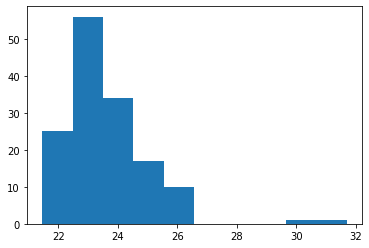

In [44]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

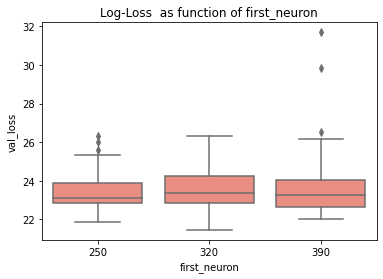

In [45]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}') #ta

Text(0.5, 1.0, 'EI Validation Loss as function of first neuron')

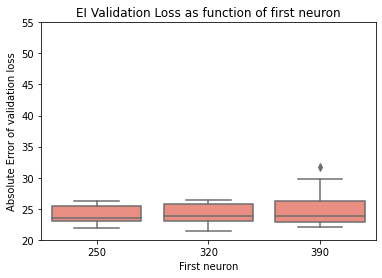

In [3]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20, 55]) 
ax.set_title('First neuron')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('First neuron')
ax.set_title('EI Validation Loss as function of first neuron') #ta


### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

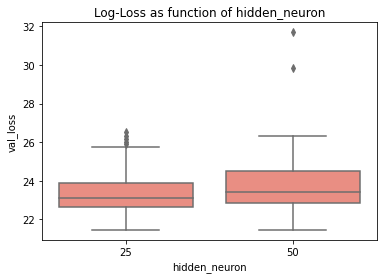

In [46]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}') #ta

Text(0.5, 1.0, 'EI Validation Loss as function of hidden neuron')

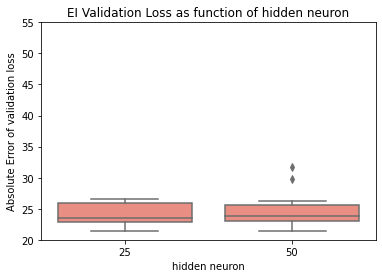

In [4]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20, 55]) 
ax.set_title('Hidden neuron')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('hidden neuron')
ax.set_title('EI Validation Loss as function of hidden neuron') #ta


### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

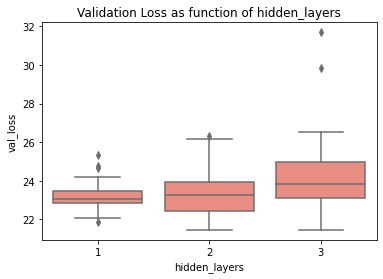

In [47]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

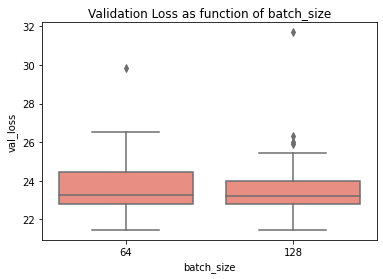

In [48]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')
#ta

Text(0.5, 1.0, 'EI Validation Loss as function of batch size')

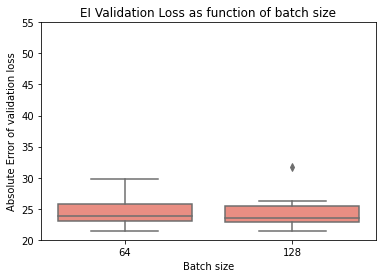

In [5]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20, 55]) 
ax.set_title('Batch size')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Batch size')
ax.set_title('EI Validation Loss as function of batch size') #ta


### 3.3.5 kernel_initializer

Text(0.5, 1.0, 'Validation Loss as function of kernel_initializer')

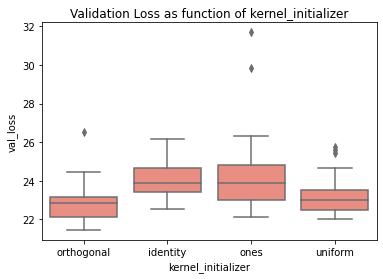

In [49]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')
#ta

Text(0.5, 1.0, 'EI Validation Loss as function of kernel initializer')

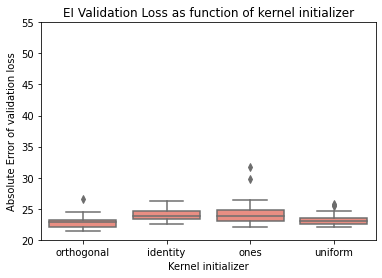

In [6]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df[df['kernel_initializer']!='zeros'].reset_index(),color='salmon')
ax.set_ylim([20, 55]) 
ax.set_title('Kernel initializer')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Kernel initializer')
ax.set_title('EI Validation Loss as function of kernel initializer') #ta


In [19]:
data2=df[df['kernel_initializer']!='zeros']

In [20]:
data2

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer
0,369,19.327192,23.079364,relu,False,64,0,2000,250,1,25,orthogonal,linear,adam
1,588,19.879301,23.100030,relu,False,64,0,2000,250,1,25,identity,linear,adam
3,839,21.679048,22.975955,relu,False,64,0,2000,250,1,25,ones,linear,adam
4,547,18.922431,22.516848,relu,False,64,0,2000,250,1,25,uniform,linear,adam
5,542,17.445818,22.066166,relu,False,64,0,2000,250,1,50,orthogonal,linear,adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,684,17.732487,22.635346,relu,False,128,0,2000,390,3,25,uniform,linear,adam
175,432,16.004058,22.629221,relu,False,128,0,2000,390,3,50,orthogonal,linear,adam
176,481,18.170797,24.319898,relu,False,128,0,2000,390,3,50,identity,linear,adam
178,2000,25.207686,31.692517,relu,False,128,0,2000,390,3,50,ones,linear,adam
